This notebook contains code for metrics computation on TID2013 and KADID10k datasets.
Their regression and computation of PLCC, SRCC, KRCC and RMSE metrics. 


Similar to (5), the exponents $\alpha_M$ , $\beta_j$ and $\gamma_j$ are used to adjust the relative importance of different components. This multi- scale SSIM index definition satisfies the three conditions given in the last section. It also includes the single-scale method as a special case. 

$
\textrm{MS-SSIM} = [l_M (\mathbf{x}, \mathbf{y})]^{\alpha_M} \cdot \Pi_{j=1}^{M}[c_j(\mathbf{x}, \mathbf{y})]^{\beta_j} [s_j (\mathbf{x}, \mathbf{y})]^{\gamma_j}
$

\subsubsection{Gradient Magnitude Simularity (GMS)}

$ g_x(i) = \sqrt{ (x * k_x)^2 + (x * k_y)^2 }$

$ g_y(i) = \sqrt{ (y * k_x)^2 + (y * k_y)^2 } $

$GMS(x, y) = \frac{2 g_x \cdot g_y + c}{g_x^2 + g_y^2 + c} $




Unlike typical IQA metrics which usually give the final assessment score by averaging the similarity map, the final score of GMSD is proposed by computing the standard devi- ation of the GMS map:


$ \textrm{GMSD} =  \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (GMS(i) - \mu_{GMS} )^2} $

Where $\mu_{GMS}$ is a spatial mean of gradient similarity map obtained by average pooling. 

# Imports

In [1]:
# !pip install albumentations

In [2]:
# General imports
import os
import sys
import random 
import functools

import cv2
import piq
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm
import matplotlib.pyplot as plt 
import albumentations as albu
import albumentations.pytorch as albu_pt

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

# Fix to be able to import python modules inside a notebook
os.chdir('..')

# Useful extensions
# %load_ext watermark
# %watermark -v -n -m -p numpy,torch,albumentations,photosynthesis_metrics

# %load_ext autoreload
# %autoreload 2

# Nice plot formating
%matplotlib inline

In [4]:
!ls

configs  Makefile	      notebooks  reports	   tests
data	 models		      old_logs	 requirements.txt  train.py
logs	 my_labeling_project  README.md  src		   WORKPLAN.md


# Test TID2013 and KADID10k datasets


In [5]:
from src.data.datasets import TID2013, KADID10k, DistortionSampler

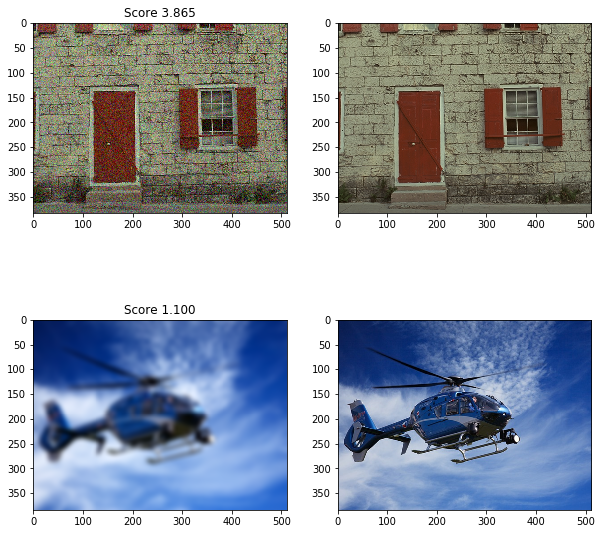

In [6]:
DATASET_FROM_NAME = {
    "tid2013": TID2013,
    "kadid10k": KADID10k,
}

datasets = ["tid2013", "kadid10k"]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])
        
plt.figure(figsize=(10, 10))
for i, name in enumerate(datasets):
    dataset = DATASET_FROM_NAME[name](transform=transform)
    distorted, reference, score = dataset[4]
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(distorted.permute(1, 2, 0))
    plt.title(f"Score {score:0.3f}")
    plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(reference.permute(1, 2, 0))
    
    

# Сompute metric predictions for TID2013 and KADID10k


In [7]:
from src.features.evaluation import compute_metrics, save_scores, fit_regression

import albumentations as albu
import albumentations.pytorch as albu_pt

In [8]:
metric_names_all = [
    'psnr', 
    'ssim', 
    'ms_ssim', 
#     "iw_ssim",
    'vif_p', 
    'gmsd', 
    'ms_gmsd', 
    'ms_gmsdc',
    'fsim', 
    'fsimc', 
    'vsi',
    'mdsi',

    'brisque',
    
    "content_vgg16",
    "content_vgg16_ap",

    "content_vgg19",
    "content_vgg19_ap",
 
    "style_vgg16",
    "style_vgg19",

    "lpips",
    "lpips_ap",
    'dists',
    
    'kid',
    'fid',
    'is',
    'msid',
    'gs',
]

## TID2013

In [10]:
DATASET = 'tid2013'

### Simple Full Reference first

In [11]:
metrics_list = [
#     'psnr', 
#     'ssim', 
#     'ms_ssim', 
#     "iw_ssim",
#     'vif_p', 
#     'vif_p_2', 
#     'gmsd', 
    'ms_gmsd', 
    'ms_gmsdc',
#     'fsim', 
#     'fsimc', 
#     'vsi',
#     'mdsi',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

# metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name=None, fullref=True, noref=False, dist=False)
# save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=1)

ms_gmsd: PLCC 0.859 ± 0.000 SRCC 0.811 ± 0.000 KRCC 0.643 ± 0.000
ms_gmsdc: PLCC 0.860 ± 0.000 SRCC 0.813 ± 0.000 KRCC 0.645 ± 0.000


### No reference

In [ ]:
metrics_list = [
#     'brisque',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name=None, fullref=False, noref=True, dist=False)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)

### Content & Style & LPIPS

In [ ]:
metrics_list = [
#     'lpips',
#     'dists',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name=None, fullref=True, noref=False, dist=False)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)


### Distribution metrics

In [ ]:
metrics_list = [
#     'kid',
#     'fid',
#     'is',
#     'msid',
#     'gs',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

# feature_extractor = piq.feature_extractors.fid_inception.InceptionV3(
#     resize_input=True, 
#     normalize_input=True,
#     requires_grad=False,
#     use_fid_inception=True
# )

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name='inception', fullref=False, noref=False, dist=True)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)

In [ ]:
metrics_list = [
#     'kid_vgg16',
#     'fid_vgg16',
#     'is_vgg16',
#     'msid_vgg16'
#     'gs_vgg16',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name='vgg16', fullref=False, noref=False, dist=True)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)



In [ ]:
metrics_list = [
#     'kid_vgg19',
#     'fid_vgg19',
#     'is_vgg19',
#     'msid_vgg19'
#     'gs_vgg19',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name='vgg19', fullref=False, noref=False, dist=True)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)

### Results

In [ ]:
# Results
+ psnr: PLCC 0.66 ± 0.02 SRCC 0.68 ± 0.02 KRCC 0.49 ± 0.02
psnr_y: PLCC 0.4506 ± 0.0000 SRCC 0.6396 ± 0.0000 KRCC 0.4698 ± 0.0000
+ ssim: PLCC 0.56 ± 0.02 SRCC 0.55 ± 0.02 KRCC 0.39 ± 0.01
+ ms_ssim: PLCC 0.77 ± 0.02 SRCC 0.80 ± 0.02 KRCC 0.60 ± 0.01
+ iw_ssim: PLCC 0.77 ± 0.01 SRCC 0.78 ± 0.03 KRCC 0.60 ± 0.03
+ vif_p: PLCC 0.63 ± 0.03 SRCC 0.45 ± 0.03 KRCC 0.32 ± 0.02
+ gmsd: PLCC 0.85 ± 0.01 SRCC 0.80 ± 0.02 KRCC 0.63 ± 0.02
+ ms_gmsd: PLCC 0.86 ± 0.00 SRCC 0.81 ± 0.01 KRCC 0.64 ± 0.01
+ ms_gmsdc: PLCC 0.86 ± 0.01 SRCC 0.81 ± 0.01 KRCC 0.64 ± 0.01
+ fsim: PLCC 0.82 ± 0.01 SRCC 0.80 ± 0.01 KRCC 0.63 ± 0.01
+ fsimc: PLCC 0.83 ± 0.01 SRCC 0.85 ± 0.00 KRCC 0.67 ± 0.00
+ vsi: PLCC 0.84 ± 0.01 SRCC 0.89 ± 0.01 KRCC 0.72 ± 0.01
mdsi: PLCC 0.8924 ± 0.0000 SRCC 0.8899 ± 0.0000 KRCC 0.7123 ± 0.0000
    
+brisque: PLCC 0.24 ± 0.00 SRCC 0.20 ± 0.00 KRCC 0.14 ± 0.00
    
    
+content_vgg16: PLCC 0.75 ± 0.02 SRCC 0.67 ± 0.02 KRCC 0.50 ± 0.01
+content_vgg16_ap: PLCC 0.77 ± 0.02 SRCC 0.71 ± 0.03 KRCC 0.53 ± 0.03
    
+content_vgg19: PLCC 0.75 ± 0.02 SRCC 0.67 ± 0.02 KRCC 0.50 ± 0.02
+content_vgg19_ap: PLCC 0.76 ± 0.02 SRCC 0.68 ± 0.04 KRCC 0.51 ± 0.03

+style_vgg16: PLCC 0.50 ± 0.03 SRCC 0.50 ± 0.03 KRCC 0.35 ± 0.03
+style_vgg19: PLCC 0.49 ± 0.01 SRCC 0.50 ± 0.02 KRCC 0.35 ± 0.01
    
+lpips: PLCC 0.73 ± 0.01 SRCC 0.67 ± 0.01 KRCC 0.50 ± 0.01
+lpips_ap: PLCC 0.76 ± 0.01 SRCC 0.69 ± 0.03 KRCC 0.52 ± 0.02
dists: PLCC 0.76 ± 0.02 SRCC 0.71 ± 0.03 KRCC 0.53 ± 0.02

+kid: PLCC 0.42 ± 0.03 SRCC 0.42 ± 0.04 KRCC 0.31 ± 0.03
+fid: PLCC 0.54 ± 0.02 SRCC 0.67 ± 0.02 KRCC 0.50 ± 0.02
??? +gs: PLCC 0.346 SRCC 0.370 KRCC 0.259
+is: PLCC 0.30 ± 0.05 SRCC 0.26 ± 0.05 KRCC 0.18 ± 0.03
+msid: PLCC 0.31 ± 0.02 SRCC 0.21 ± 0.01 KRCC 0.14 ± 0.01


+kid_vgg16: PLCC 0.72 ± 0.01 SRCC 0.70 ± 0.01 KRCC 0.52 ± 0.01
+fid_vgg16: PLCC 0.76 ± 0.01 SRCC 0.74 ± 0.01 KRCC 0.55 ± 0.01
??? +gs_vgg16: PLCC 0.463 SRCC 0.465 KRCC 0.325
+is_vgg16: PLCC 0.69 ± 0.03 SRCC 0.64 ± 0.03 KRCC 0.46 ± 0.03
+msid_vgg16: PLCC 0.72 ± 0.02 SRCC 0.69 ± 0.01 KRCC 0.51 ± 0.01

## KADID10k

In [19]:
DATASET = 'kadid10k'

### Simple Full Reference metrics

In [20]:
metrics_list = [
#     'psnr', 
#     'ssim', 
#     'ms_ssim', 
#     'iw_ssim',
#     'vif_p', 
#     'vif_p_2', 
#     'gmsd', 
#     'ms_gmsd', 
#     'ms_gmsdc',
#     'fsim', 
#     'fsimc', 
#     'vsi',
#     'mdsi',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name=None, fullref=True, noref=False, dist=False)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=1)


psnr_y 10125
psnr_y: PLCC 0.5329 ± 0.0000 SRCC 0.6319 ± 0.0000 KRCC 0.4556 ± 0.0000


### No Reference

In [ ]:
metrics_list = [
#     'brisque',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])`

metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, feature_extractor=None, fullref=False, noref=True, dist=False)
save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list)

### Content & Style & LPIPS

In [ ]:
metrics_list = [
#     "content_vgg16",
#     "content_vgg16_ap",

#     "content_vgg19",
#     "content_vgg19_ap",

#     "style_vgg16_norm",
#     "style_vgg19_norm",
 
#     "style_vgg16",
#     "style_vgg19",

#     "lpips",
#     "lpips_ap",

#     'dists',
#     'dists_ssim',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

# metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name=None, fullref=True, noref=False, dist=False)
# save_scores(DATASET, metric_scores)
fit_regression(DATASET, metrics_list, num_folds=5)

### Distribution metrics

In [ ]:
# metric_scores

In [ ]:
metrics_list = [
#     'kid',
#     'fid',
#     'is',
#     'msid',
#     'gs',
]

transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

# feature_extractor = piq.feature_extractors.fid_inception.InceptionV3(
#     resize_input=True, 
#     normalize_input=True,
#     requires_grad=False,
#     use_fid_inception=True
# )

# metric_scores = compute_metrics(DATASET, transform, 10, metrics_list, extractor_name='inception', fullref=False, noref=False, dist=True)
# save_scores(DATASET, metric_scores)

### Results

In [ ]:
+psnr: PLCC 0.56 ± 0.00 SRCC 0.68 ± 0.00 KRCC 0.49 ± 0.00
psnr_y: PLCC 0.5329 ± 0.0000 SRCC 0.6319 ± 0.0000 KRCC 0.4556 ± 0.0000
+ssim: PLCC 0.60 ± 0.00 SRCC 0.63 ± 0.00 KRCC 0.46 ± 0.00
+ms_ssim: PLCC 0.68 ± 0.00 SRCC 0.80 ± 0.00 KRCC 0.61 ± 0.00
iw_ssim: PLCC 0.72 ± 0.01 SRCC 0.85 ± 0.01 KRCC 0.67 ± 0.01
???vif_p: PLCC 0.02 ± 0.00 SRCC 0.45 ± 0.00 KRCC 0.32 ± 0.00
???vif_p_2: PLCC 0.01 ± 0.00 SRCC 0.45 ± 0.00 KRCC 0.32 ± 0.00
+gmsd: PLCC 0.80 ± 0.00 SRCC 0.85 ± 0.00 KRCC 0.66 ± 0.00
+ms_gmsd: PLCC 0.81 ± 0.00 SRCC 0.85 ± 0.00 KRCC 0.67 ± 0.00
+ms_gmsdc: PLCC 0.79 ± 0.00 SRCC 0.85 ± 0.00 KRCC 0.67 ± 0.00
+fsim: PLCC 0.68 ± 0.00 SRCC 0.83 ± 0.00 KRCC 0.64 ± 0.00
+fsimc: PLCC 0.71 ± 0.00 SRCC 0.85 ± 0.00 KRCC 0.66 ± 0.00
+vsi: PLCC 0.70 ± 0.01 SRCC 0.88 ± 0.00 KRCC 0.69 ± 0.00
mdsi: PLCC 0.84 ± 0.00 SRCC 0.89 ± 0.00 KRCC 0.70
    

+brisque: PLCC 0.24 ± 0.00 SRCC 0.20 ± 0.00 KRCC 0.14 ± 0.00
    
content_vgg16: PLCC 0.66 ± 0.01 SRCC 0.71 ± 0.01 KRCC 0.52 ± 0.01
content_vgg16_ap: PLCC 0.71 ± 0.01 SRCC 0.76 ± 0.01 KRCC 0.57 ± 0.01
content_vgg19: PLCC 0.68 ± 0.01 SRCC 0.71 ± 0.01 KRCC 0.52 ± 0.01
content_vgg19_ap: PLCC 0.71 ± 0.01 SRCC 0.75 ± 0.01 KRCC 0.56 ± 0.01
    
style_vgg16_norm: PLCC 0.36 ± 0.02 SRCC 0.56 ± 0.01 KRCC 0.40 ± 0.01
style_vgg19_norm: PLCC 0.36 ± 0.02 SRCC 0.57 ± 0.01 KRCC 0.40 ± 0.01

dists: PLCC 0.81 ± 0.01 SRCC 0.81 ± 0.01 KRCC 0.62 ± 0.01

    
kid: PLCC 0.59 ± 0.01 SRCC 0.63 ± 0.01 KRCC 0.46 ± 0.01
fid: PLCC -0.48 ± 0.00 SRCC -0.66 ± 0.01 KRCC -0.49 ± 0.01
is: PLCC 0.32 ± 0.02 SRCC 0.25 ± 0.02 KRCC 0.17 ± 0.02
    PLCC 0.31 ± 0.02 SRCC 0.25 ± 0.03 KRCC 0.19 ± 0.02

msid: PLCC 0.34 ± 0.03 SRCC 0.32 ± 0.03 KRCC 0.22 ± 0.02

In [ ]:
# Plot graph: Ox - metric value, Oy - MOS. Blue cross - image in dataset. Black line - fitted logregression
plt.plot(metric_scores, mos_scores, "+")
x = np.arange(0.0, 1.0, 0.005)
y = model(torch.tensor(x))
plt.plot(x, y.detach().numpy())

# Compute score for greyscale images

In [25]:
import os
import collections
from typing import List

import piq
import torch
import numpy as np
import torchvision
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr, kendalltau

from src.features.metrics import METRIC_FROM_NAME
from src.features.models import Regression
from src.data.utils import crop_patches
from src.data.datasets import TID2013, KADID10k, DistortionSampler
from src.features.functional import metrics_from_list

# Useful for some metrics
torch.multiprocessing.set_sharing_strategy('file_system')
DATASET_FROM_NAME = {
    "tid2013": TID2013,
    "kadid10k": KADID10k,
}

def compute_metrics(
        dataset_name: str,
        transform,
        batch_size: int,
        metrics_list: List[str],
        distortion: str,
        extractor_name: str,
        fullref: bool = False,
        noref: bool = False,
        dist: bool = False):
    """Compute metrics on a given dataset
    Args:
        name: Dataset name. One of {'tid2013', 'koniq10k'}
        transform: albumentations.transform
        batch_size: Number of images to sample at once
        metrics_list: Metrics to compute.
        distortion: Distortion to use. 
        feature_extractor: Model used to extract image features
        noref: Flag to compute BRISQUE
        dist: Flag to compute distribution based metrics
    Returns:
        metric_scores: Dict with keys same as metric list and values torch.Tensors of results
    """
    distortions = DATASET_FROM_NAME[dataset_name]().df['dist_type'].unique()
    metric_scores = collections.defaultdict(list)

    # Init metrics
    metrics = metrics_from_list(metrics_list, model_name="vgg16", reduction="none")
#     metrics = [METRIC_FROM_NAME[metric] for metric in metrics_list]

    if dist and (extractor_name == "vgg16"):
        feature_extractor = torchvision.models.vgg16(pretrained=True, progress=True).features.to("cuda")
    elif dist and (extractor_name == "vgg19"):
        feature_extractor = torchvision.models.vgg19(pretrained=True, progress=True).features.to("cuda")
    elif dist and (extractor_name == "inception"):
        feature_extractor = piq.feature_extractors.InceptionV3(
            resize_input=False, use_fid_inception=True, normalize_input=True).to("cuda")
    elif dist:
        raise ValueError("Wrong feature extractor name")

    # Reinit dataset
    dataset = DATASET_FROM_NAME[dataset_name](transform=transform)
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=4,
        sampler=DistortionSampler(dataset, dist_type=distortion),
        drop_last=False,
    )

    distorted_features, reference_features = [], []

    for (distorted_images, reference_images, score) in loader:
        distorted_images, reference_images = distorted_images.to("cuda"), reference_images.to("cuda")
        metric_scores['score'].append(score.cpu().numpy())

        if fullref:
            for name, metric in zip(metrics_list, metrics):
                metric_scores[name].extend(metric(distorted_images, reference_images).cpu().numpy())

        if noref:
            for name, metric in zip(metrics_list, metrics):
                metric_scores[name].extend(metric(distorted_images).cpu().numpy())

        if dist:
            # Create patches
            distorted_patches = crop_patches(distorted_images, size=96, stride=32)
            reference_patches = crop_patches(reference_images, size=96, stride=32)

            # Extract features from distorted images
            patch_loader = distorted_patches.view(-1, 10, *distorted_patches.shape[-3:])
            for patches in patch_loader:
                with torch.no_grad():
                    if extractor_name == "inception":
                        features = feature_extractor(patches)
                        distorted_features.append(features[0].squeeze())
                    elif extractor_name == "vgg16":
                        features = torch.nn.functional.avg_pool2d(feature_extractor(patches), 3)
                        distorted_features.append(features.squeeze())
                    elif extractor_name == "vgg19":
                        features = torch.nn.functional.avg_pool2d(feature_extractor(patches), 3)
                        distorted_features.append(features.squeeze())

            # Extract features from reference images
            patch_loader = reference_patches.view(-1, 10, *reference_patches.shape[-3:])
            for patches in patch_loader:
                with torch.no_grad():
                    if extractor_name == "inception":
                        features = feature_extractor(patches)
                        reference_features.append(features[0].squeeze())
                    elif extractor_name == "vgg16":
                        features = torch.nn.functional.avg_pool2d(feature_extractor(patches), 3)
                        reference_features.append(features.squeeze())
                    elif extractor_name == "vgg19":
                        features = torch.nn.functional.avg_pool2d(feature_extractor(patches), 3)
                        reference_features.append(features.squeeze())
    if dist:
        distorted_features = torch.cat(distorted_features, dim=0)
        reference_features = torch.cat(reference_features, dim=0)

        for name, metric in zip(metrics_list, metrics):
            score = metric(distorted_features, reference_features)
            metric_scores[name].extend([score.cpu().numpy()] * len(dataset))

    return metric_scores

## TID2013

In [26]:
from src.features.metrics import METRIC_FROM_NAME

# Compute correlation for one particular type of distortions - greyscale images.
DISTORTION = "18_5"
DATASET = "tid2013"

metrics_list = [
    'psnr', 
    'ssim', 
    'ms-ssim', 
#     "iw-ssim",
    'vifp', 
    'gmsd', 
    'ms-gmsd', 
    'ms-gmsdc',
    'fsim', 
    'fsimc', 
    'vsi',
    'mdsi',
]


transform = albu.Compose([
    albu.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.], ), # to [0, 1]
    albu_pt.ToTensorV2(),
])

metric_scores = compute_metrics(
    dataset_name=DATASET,
    transform=transform,
    batch_size=10,
    metrics_list=metrics_list,
    distortion=DISTORTION,
    extractor_name=None,
    fullref=True,
    noref=False,
    dist=False
)

In [53]:
# metric_scores.pop('score')

KeyError: 'score'

In [50]:
metric_scores['psnr']

[20.992537,
 21.020212,
 21.00499,
 20.98719,
 20.985296,
 21.024778,
 21.012766,
 20.980202,
 20.993225,
 22.171404,
 20.985775,
 21.00528,
 21.003437,
 20.994757,
 21.016386,
 21.011126,
 23.708637,
 21.022635,
 20.985466,
 21.004526,
 21.02071,
 21.00601,
 20.996521,
 21.008213,
 21.016392]

In [58]:
save_scores("tid2013_grey", metric_scores)
fit_regression("tid2013_grey", metrics_list, num_folds=1)


psnr 25
ssim 25
ms-ssim 25
vifp 25
gmsd 25
ms-gmsd 25
ms-gmsdc 25
fsim 25
fsimc 25
vsi 25
mdsi 25
psnr: PLCC -0.045 ± 0.000 SRCC 0.171 ± 0.000 KRCC 0.100 ± 0.000
ssim: PLCC -0.203 ± 0.000 SRCC -0.110 ± 0.000 KRCC -0.073 ± 0.000
ms-ssim: PLCC 0.197 ± 0.000 SRCC 0.182 ± 0.000 KRCC 0.100 ± 0.000
vifp: PLCC 0.001 ± 0.000 SRCC 0.216 ± 0.000 KRCC 0.107 ± 0.000
gmsd: PLCC -0.269 ± 0.000 SRCC -0.095 ± 0.000 KRCC -0.062 ± 0.000
ms-gmsd: PLCC -0.209 ± 0.000 SRCC -0.051 ± 0.000 KRCC -0.028 ± 0.000
ms-gmsdc: PLCC -0.171 ± 0.000 SRCC -0.035 ± 0.000 KRCC -0.004 ± 0.000
fsim: PLCC 0.014 ± 0.000 SRCC -0.098 ± 0.000 KRCC -0.087 ± 0.000
fsimc: PLCC 0.208 ± 0.000 SRCC 0.133 ± 0.000 KRCC 0.093 ± 0.000
vsi: PLCC 0.339 ± 0.000 SRCC 0.253 ± 0.000 KRCC 0.153 ± 0.000
mdsi: PLCC -0.482 ± 0.000 SRCC -0.387 ± 0.000 KRCC -0.300 ± 0.000


In [ ]:
psnr: PLCC -0.045 ± 0.000 SRCC 0.171 ± 0.000 KRCC 0.100 ± 0.000
ssim: PLCC -0.203 ± 0.000 SRCC -0.110 ± 0.000 KRCC -0.073 ± 0.000
ms-ssim: PLCC 0.197 ± 0.000 SRCC 0.182 ± 0.000 KRCC 0.100 ± 0.000
vifp: PLCC 0.001 ± 0.000 SRCC 0.216 ± 0.000 KRCC 0.107 ± 0.000
gmsd: PLCC -0.269 ± 0.000 SRCC -0.095 ± 0.000 KRCC -0.062 ± 0.000
ms-gmsd: PLCC -0.209 ± 0.000 SRCC -0.051 ± 0.000 KRCC -0.028 ± 0.000
ms-gmsdc: PLCC -0.171 ± 0.000 SRCC -0.035 ± 0.000 KRCC -0.004 ± 0.000
fsim: PLCC 0.014 ± 0.000 SRCC -0.098 ± 0.000 KRCC -0.087 ± 0.000
fsimc: PLCC 0.208 ± 0.000 SRCC 0.133 ± 0.000 KRCC 0.093 ± 0.000
vsi: PLCC 0.339 ± 0.000 SRCC 0.253 ± 0.000 KRCC 0.153 ± 0.000
mdsi: PLCC -0.482 ± 0.000 SRCC -0.387 ± 0.000 KRCC -0.300 ± 0.000
    

In [56]:
def save_scores(dataset_name, metric_scores):
    if not os.path.exists(f'data/interim/{dataset_name}'):
        os.mknod(f'data/interim/{dataset_name}')

    for key in metric_scores.keys():
        value = metric_scores[key]

        # Reduce
#         scores = np.concatenate(value)
        scores = value

        # Delete old file and create new one
        try:
            os.remove(f"data/interim/{dataset_name}/{key}.txt")
        except OSError:
            pass

        with open(f"data/interim/{dataset_name}/{key}.txt", "w") as file:
            # file.write('\n'.join(str(score) for score in scores.cpu().numpy()))
            file.write('\n'.join(str(score) for score in scores))
        print(key, len(scores))

# Copy-paste metrics not yet merged into master

## IW-SSIM

In [32]:
r""" This module implements Information Weighted Structural Similarity Index Measure (IW-SSIM) using PyTorch.

Implementation of classes and functions from this module are inspired by Gongfan Fang's (@VainF) implementation:
https://github.com/VainF/pytorch-msssim

Reference:
https://github.com/Jack-guo-xy/Python-IW-SSIM
"""

import torch.nn.functional as F
import pyrtools as pt
import numpy as np
import torch

from piq.functional import rgb2yiq

class IW_SSIM(nn.Module):
    def __init__(self, iw_flag=True, Nsc=5, blSzX=3, blSzY=3, parent=True,
                 sigma_nsq=0.4, use_cuda=False, use_double=False):
        super().__init__()
        # MS-SSIM parameters
        self.K = [0.01, 0.03]
        self.L = 255
        self.weight = [0.0448, 0.2856, 0.3001, 0.2363, 0.1333]
        self.winsize = 11
        self.sigma = 1.5

        # IW-SSIM parameters
        self.iw_flag = iw_flag
        self.Nsc = Nsc    # scales
        self.blSzX = blSzX  # Neighbor size
        self.blSzY = blSzY
        self.parent = parent
        self.sigma_nsq = sigma_nsq

        self.bound = np.ceil((self.winsize-1)/2)
        self.bound1 = self.bound - np.floor((self.blSzX-1)/2)
        self.use_cuda = use_cuda
        self.use_double = use_double

        self.samplet = torch.tensor([1.0])
        if self.use_cuda:
            self.samplet = self.samplet.cuda()
        if self.use_double:
            self.samplet = self.samplet.double()
        self.samplen = np.array([1.0])
        if not self.use_double:
            self.samplen = self.samplen.astype('float32')

    def fspecial(self, fltr, ws, **kwargs):
        if fltr == 'uniform':
            return np.ones((ws, ws)) / ws**2

        elif fltr == 'gaussian':
            x, y = np.mgrid[-ws//2 + 1:ws//2 + 1, -ws//2 + 1:ws//2 + 1]
            g = np.exp(-((x**2 + y**2)/(2.0*kwargs['sigma']**2)))
            g[g < np.finfo(g.dtype).eps*g.max()] = 0
            assert g.shape == (ws, ws)
            den = g.sum()
            if den != 0:
                g /= den
            return g

        return None

    def get_pyrd(self, imgo, imgd):
        imgopr = {}
        imgdpr = {}
        lpo = pt.pyramids.LaplacianPyramid(imgo, height=5)
        lpd = pt.pyramids.LaplacianPyramid(imgd, height=5)
        for scale in range(1, self.Nsc + 1):
            imgopr[scale] = torch.from_numpy(lpo.pyr_coeffs[(scale-1, 0)]).unsqueeze(0).unsqueeze(0).type(self.samplet.type()) 
            imgdpr[scale] = torch.from_numpy(lpd.pyr_coeffs[(scale-1, 0)]).unsqueeze(0).unsqueeze(0).type(self.samplet.type())

        return imgopr, imgdpr

    def scale_qualty_maps(self, imgopr, imgdpr):

        ms_win = self.fspecial('gaussian', ws=self.winsize, sigma=self.sigma)
        ms_win = torch.from_numpy(ms_win).unsqueeze(0).unsqueeze(0).type(self.samplet.type())
        C1 = (self.K[0]*self.L)**2
        C2 = (self.K[1]*self.L)**2
        cs_map = {}
        for i in range(1, self.Nsc+1):
            imgo = imgopr[i]
            imgd = imgdpr[i]
            mu1 = F.conv2d(imgo, ms_win)
            mu2 = F.conv2d(imgd, ms_win)
            sigma12 = F.conv2d(imgo*imgd, ms_win) - mu1*mu2
            sigma1_sq = F.conv2d(imgo**2, ms_win) - mu1*mu1
            sigma2_sq = F.conv2d(imgd**2, ms_win) - mu2*mu2
            sigma1_sq = torch.max(torch.zeros(sigma1_sq.shape).type(self.samplet.type()), sigma1_sq)
            sigma2_sq = torch.max(torch.zeros(sigma2_sq.shape).type(self.samplet.type()), sigma2_sq)
            cs_map[i] = (2*sigma12+C2) / (sigma1_sq + sigma2_sq + C2)
            if i == self.Nsc:
                l_map = (2*mu1*mu2+C1) / (mu1**2+mu2**2+C1)

        return l_map, cs_map

    def roll(self, x, shift, dim):
        if dim == 0:
            return torch.cat((x[-shift:, :], x[:-shift, :]), dim)
        else:
            return torch.cat((x[:, -shift:], x[:, :-shift]), dim)

    def imenlarge2(self, im):
        _, _, M, N = im.shape
        t1 = F.upsample(im, size=(int(4*M-3), int(4*N-3)), mode='bilinear')
        t2 = torch.zeros([1, 1, 4*M-1, 4*N-1]).type(self.samplet.type())
        t2[:, :, 1: -1, 1:-1] = t1
        t2[:, :, 0, :] = 2*t2[:, :, 1, :] - t2[:, :, 2, :]
        t2[:, :, -1, :] = 2*t2[:, :, -2, :] - t2[:, :, -3, :]
        t2[:, :, :, 0] = 2*t2[:, :, :, 1] - t2[:, :, :, 2]
        t2[:, :, :, -1] = 2*t2[:, :, :, -2] - t2[:, :, :, -3]
        imu = t2[:, :, ::2, ::2]

        return imu

    def info_content_weight_map(self, imgopr, imgdpr):

        tol = 1e-15
        iw_map = {}
        for scale in range(1, self.Nsc):

            imgo = imgopr[scale]
            imgd = imgdpr[scale]
            win = np.ones([self.blSzX, self.blSzY])
            win = win / np.sum(win)
            win = torch.from_numpy(win).unsqueeze(0).unsqueeze(0).type(self.samplet.type())
            padding = int((self.blSzX-1)/2)

            # Prepare for estimating IW-SSIM parameters
            mean_x = F.conv2d(imgo, win, padding=padding)
            mean_y = F.conv2d(imgd, win, padding=padding)
            cov_xy = F.conv2d(imgo*imgd, win, padding=padding) - mean_x*mean_y
            ss_x = F.conv2d(imgo**2, win, padding=padding) - mean_x**2
            ss_y = F.conv2d(imgd**2, win, padding=padding) - mean_y**2

            ss_x[ss_x < 0] = 0
            ss_y[ss_y < 0] = 0

            # Estimate gain factor and error
            g = cov_xy / (ss_x + tol)
            vv = (ss_y - g*cov_xy)
            g[ss_x < tol] = 0
            vv[ss_x < tol] = ss_y[ss_x < tol]
            ss_x[ss_x < tol] = 0
            g[ss_y < tol] = 0
            vv[ss_y < tol] = 0
            
            # Prepare parent band
            aux = imgo
            _, _, Nsy, Nsx = aux.shape
            prnt = (self.parent and scale < self.Nsc-1)
            BL = torch.zeros([1, 1, aux.shape[2], aux.shape[3], 1+prnt])
            if self.use_cuda:
                BL = BL.cuda()
            if self.use_double:
                BL = BL.double()

            BL[:, :, :, :, 0] = aux
            if prnt:
                auxp = imgopr[scale+1]
                auxp = self.imenlarge2(auxp)
                BL[:, :, :, :, 1] = auxp[:, :, 0:Nsy, 0:Nsx]
            imgo = BL
            _, _, nv, nh, nb = imgo.shape

            block = torch.tensor([win.shape[2], win.shape[3]])
            if self.use_cuda:
                block = block.cuda()
            
            # Group neighboring pixels
            nblv = nv-block[0]+1
            nblh = nh-block[1]+1
            nexp = nblv*nblh
            N = torch.prod(block) + prnt
            Ly = int((block[0]-1)/2)
            Lx = int((block[1]-1)/2)
            Y = torch.zeros([nexp, N]).type(self.samplet.type())

            n = -1
            for ny in range(-Ly, Ly+1):
                for nx in range(-Lx, Lx+1):
                    n = n + 1
                    temp = imgo[0, 0, :, :, 0]
                    foo1 = self.roll(temp, ny, 0)
                    foo = self.roll(foo1, nx, 1)
                    foo = foo[Ly: Ly+nblv, Lx: Lx+nblh]
                    Y[:, n] = foo.flatten()
            if prnt:
                n = n + 1
                temp = imgo[0, 0, :, :, 1]
                foo = temp
                foo = foo[Ly: Ly+nblv, Lx: Lx+nblh]
                Y[:, n] = foo.flatten()

            C_u = torch.mm(torch.transpose(Y, 0, 1), Y) / nexp.type(self.samplet.type())
            eig_values, H = torch.eig(C_u, eigenvectors=True)
            eig_values = eig_values.type(self.samplet.type())
            H = H.type(self.samplet.type())
            if self.use_double:
                L = torch.diag(eig_values[:, 0] * (eig_values[:, 0] > 0).double()) * torch.sum(eig_values) / ((torch.sum(eig_values[:,0] * (eig_values[:, 0] > 0).double())) + (torch.sum(eig_values[:, 0] * (eig_values[:, 0] > 0).double())==0)) 
            else:
                L = torch.diag(eig_values[:, 0] * (eig_values[:, 0] > 0).float()) * torch.sum(eig_values) / ((torch.sum(eig_values[:,0] * (eig_values[:, 0] > 0).float())) + (torch.sum(eig_values[:, 0] * (eig_values[:, 0] > 0).float())==0)) 
            C_u = torch.mm(torch.mm(H, L), torch.transpose(H, 0, 1))
            C_u_inv = torch.inverse(C_u)
            ss = (torch.mm(Y, C_u_inv))*Y / N.type(self.samplet.type())
            ss = torch.sum(ss, 1)
            ss = ss.view(nblv, nblh)
            ss = ss.unsqueeze(0).unsqueeze(0)
            g = g[:, :, Ly: Ly+nblv, Lx: Lx+nblh]
            vv = vv[:, :, Ly: Ly+nblv, Lx: Lx+nblh]

            # Calculate mutual information
            infow = torch.zeros(g.shape).type(self.samplet.type())
            for j in range(len(eig_values)):
                infow = infow + torch.log2(1 + ((vv + (1 + g*g)*self.sigma_nsq)*ss*eig_values[j, 0]+self.sigma_nsq*vv) / (self.sigma_nsq*self.sigma_nsq))
            infow[infow < tol] = 0
            iw_map[scale] = infow

        return iw_map
    
    def forward(self, prediction, target):
        """
        Args:
            prediction: tensor of shape B x C x H x W
            target: tensor of shape B x C x H x W"""
        # Convert to YIQ and take luminance
        B = prediction.size(0)
        prediction = rgb2yiq(prediction)[:,0]
        target = rgb2yiq(target)[:,0]
        
        result = []
        for i in range(B):
            imgo = target[i].cpu().numpy() * 255
            imgd = prediction[i].cpu().numpy() * 255

            imgo = imgo.astype(self.samplen.dtype)
            imgd = imgd.astype(self.samplen.dtype)
            imgopr, imgdpr = self.get_pyrd(imgo, imgd)
            l_map, cs_map = self.scale_qualty_maps(imgopr, imgdpr)
            if self.iw_flag:
                iw_map = self.info_content_weight_map(imgopr, imgdpr)

            wmcs = []
            for s in range(1, self.Nsc+1):
                cs = cs_map[s]
                if s == self.Nsc:
                    cs = cs_map[s]*l_map

                if self.iw_flag:
                    if s < self.Nsc:
                        iw = iw_map[s]
                        if self.bound1 != 0:
                            iw = iw[:, :, int(self.bound1): -int(self.bound1), int(self.bound1): -int(self.bound1)]
                        else:
                            iw = iw[:, :, int(self.bound1):, int(self.bound1):]
                    else:
                        iw = torch.ones(cs.shape).type(self.samplet.type())
                    wmcs.append(torch.sum(cs*iw) / torch.sum(iw))
                else:
                    wmcs.append(torch.mean(cs))

            wmcs = torch.tensor(wmcs).type(self.samplet.type())
            self.weight = torch.tensor(self.weight).type(self.samplet.type())
            score = torch.prod((torch.abs(wmcs))**(self.weight))
            result.append(score)
            
        score = torch.tensor(result).reshape(B, 1)

        return score
    
iw_ssim = IW_SSIM(use_cuda=True, use_double=True)

prediction = torch.rand(3, 3, 161, 161).cuda()
target = torch.rand(3, 3, 161, 161).cuda()

print(iw_ssim(prediction, target))


tensor([[1.],
        [1.],
        [1.]], dtype=torch.float64)


# Garbage